Nombre:
----------

Francisco Benjamín Canales Jure

## 0.- Cargar librerías y explicar sus usos (2 ptos.):

- **Pandas**: Se utilizó para generar y trabajar con dataframes desde los datasets entregados.
- **Numpy**: Se utilizó para transformar algunos datos no deseados en datos nulos en los dataframes generados.
- **Matplotlib**: Se utilizó para generar gráficos circulares y de barras usando algunos atributos de los dataframes:
- **Seaborn**: Se utilizó para generar gráficos de violín usando algunos atributos de los dataframes:
- **Scikit-learn / StandardScaler**: Se utilizó para la normalización estadística general del dataframe final.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 1.- Cargar datasets y explorar los datos. Explicar las características de los dataset (estadísticas, datos Nan, datos únicos, etc.) (20 ptos.):

Apoyarse en la documentación de Pandas https://pandas.pydata.org/pandas-docs/stable/index.html y Seaborn https://seaborn.pydata.org/index.html

## Respuesta:

**1.1.- Carga de datasets CSV en su respectivo dataframe:**

In [53]:
df1 = pd.read_csv('data/bank-A.csv', sep = ';')
df2 = pd.read_csv('data/bank-B.csv', sep = ',')
df3 = pd.read_csv('data/bank-C.csv', sep = ',')
pd.set_option('display.max_columns', None)

**1.2.- Visualización parcial de cada dataframe:**

In [54]:
df1.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon
1,1536,1536,37.0,management,married,university.degree,no,yes,tue
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN


In [55]:
df2.head()

,Unnamed: 0,id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age
0,2292,2292,telephone,may,mon,231,1,999,1,failure,51.0
1,1536,1536,cellular,aug,tue,263,2,999,0,nonexistent,37.0
2,4047,4047,telephone,jun,wed,95,2,999,0,nonexistent,38.0
3,3862,3862,cellular,nov,fri,495,1,3,1,success,52.0
4,1340,1340,cellular,aug,wed,428,4,999,0,nonexistent,NaN


In [56]:
df3.head()

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact
0,2292,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,1.4,93.444,-36.1,4.964,5228.1,cellular


**1.3.- Identificación de atributos de cada dataframe:**
- Atributos **Unnamed: 0** y **id** se repitieron en todos los df.
- Atributos **age** y **day_of_week** se repitieron en los df1 y df2.
- Atributo **contact** se repitió en los df2 y df3.


In [57]:
df1.columns

Index(['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'day_of_week'],
      dtype='object')

In [58]:
df2.columns

Index(['Unnamed: 0', 'id', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'age'],
      dtype='object')

In [59]:
df3.columns

Index(['Unnamed: 0', 'id', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'contact'],
      dtype='object')

**1.4.- Identifación del tipo de dato asociado a cada atributo:**
- **int64**: número entero de 64 bits.
- **float64**: número decimal de 64 bits.
- **object**: números y secuencias de carácteres.

In [60]:
df1.dtypes

Unnamed: 0       int64
id               int64
age            float64
job             object
marital         object
education       object
default         object
housing         object
day_of_week     object
dtype: object

In [61]:
df2.dtypes

Unnamed: 0       int64
id               int64
contact         object
month           object
day_of_week     object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
age            float64
dtype: object

In [62]:
df3.dtypes

Unnamed: 0          int64
id                  int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
contact            object
dtype: object

**1.5.- Estadística despcriptiva de cada dataframe:**
- El estadístico **count** se aplicó a todos los tipos de dato.
- Los estadísticos **unique**, **top** y **freq** se aplicaron solo a datos de tipo object.
- Los estadísticos **mean**, **std**, **min**, **max** y **p%** se aplicaron solo a datos de tipo int64 y float64.

In [63]:
df1.describe(include = 'all')

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
count,50.000000,50.000000,42.000000,50,50,50,50,50,42
unique,NaN,NaN,NaN,8,3,7,2,3,5
top,NaN,NaN,NaN,blue-collar,married,university.degree,no,yes,wed
freq,NaN,NaN,NaN,13,29,15,37,27,11
mean,2461.900000,2461.900000,40.357143,NaN,NaN,NaN,NaN,NaN,NaN
std,1047.344129,1047.344129,9.084485,NaN,NaN,NaN,NaN,NaN,NaN
min,257.000000,257.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1553.750000,1553.750000,31.250000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2486.000000,2486.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3407.000000,3407.000000,48.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df2.describe(include = 'all')

,Unnamed: 0,id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age
count,50.000000,50.000000,50,50,42,50.000000,50.000000,50.000000,50.000000,50,42.000000
unique,NaN,NaN,3,6,5,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,cellular,may,wed,NaN,NaN,NaN,NaN,nonexistent,NaN
freq,NaN,NaN,26,20,13,NaN,NaN,NaN,NaN,44,NaN
mean,2461.900000,2461.900000,NaN,NaN,NaN,270.100000,2.280000,979.080000,0.120000,NaN,40.880952
std,1047.344129,1047.344129,NaN,NaN,NaN,204.363147,1.917056,140.855671,0.328261,NaN,9.292542
min,257.000000,257.000000,NaN,NaN,NaN,68.000000,1.000000,3.000000,0.000000,NaN,26.000000
25%,1553.750000,1553.750000,NaN,NaN,NaN,160.250000,1.000000,999.000000,0.000000,NaN,33.000000
50%,2486.000000,2486.000000,NaN,NaN,NaN,198.500000,2.000000,999.000000,0.000000,NaN,38.000000
75%,3407.000000,3407.000000,NaN,NaN,NaN,303.750000,3.000000,999.000000,0.000000,NaN,50.500000


In [65]:
df3.describe(include = 'all')

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cellular
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
mean,2461.900000,2461.900000,0.324000,93.588360,-40.062000,3.965080,5181.00800,NaN
std,1047.344129,1047.344129,1.392188,0.514534,4.143295,1.532579,57.86105,NaN
min,257.000000,257.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000,NaN
25%,1553.750000,1553.750000,-0.100000,93.200000,-42.700000,4.087000,5191.00000,NaN
50%,2486.000000,2486.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000,NaN
75%,3407.000000,3407.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000,NaN


**1.6.- Cantidad de datos nulos por atributo:**
- Se detectaron 8 datos nulos en los atributos **age** y **day_of_week** en df1.
- Se detectaron 8 datos nulos en los atributos **age** y **day_of_week** en df2.

In [66]:
pd.isna(df1).sum()

Unnamed: 0     0
id             0
age            8
job            0
marital        0
education      0
default        0
housing        0
day_of_week    8
dtype: int64

In [67]:
pd.isna(df2).sum()

Unnamed: 0     0
id             0
contact        0
month          0
day_of_week    8
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
age            8
dtype: int64

In [68]:
pd.isna(df3).sum()

Unnamed: 0        0
id                0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
contact           0
dtype: int64

**1.7.- Cantidad de datos únicos por atributo:**

In [69]:
df1.nunique()

Unnamed: 0     50
id             50
age            21
job             8
marital         3
education       7
default         2
housing         3
day_of_week     5
dtype: int64

In [70]:
df2.nunique()

Unnamed: 0     50
id             50
contact         3
month           6
day_of_week     5
duration       49
campaign        7
pdays           2
previous        2
poutcome        3
age            21
dtype: int64

In [71]:
df3.nunique()

Unnamed: 0        50
id                50
emp.var.rate       6
cons.price.idx    10
cons.conf.idx     10
euribor3m         30
nr.employed        7
contact            3
dtype: int64

**1.8.- Identificación de datos únicos por atributo:**
- Se identifcaron datos **NaN** en el atributo **age** de df1 y df2.
- Se identifcaron datos **NaN** en el atributo **day_of_week** de df1 y df2.
- Se identifcaron datos **unknown** en los atributos **education**, **default** y **housing** de df1.
- Se identifcaron datos **-** en el atributo **contact** de df2.
- Se identifcaron datos **NO INFO** en el atributo **contact** de df3.

In [72]:
df1['age'].unique()

array([51., 37., 38., nan, 32., 45., 54., 30., 41., 31., 46., 43., 35.,
       57., 49., 47., 27., 52., 36., 33., 55., 40.])

In [73]:
df1['job'].unique()

array(['entrepreneur', 'management', 'blue-collar', 'technician',
       'admin.', 'self-employed', 'services', 'retired'], dtype=object)

In [74]:
df1['marital'].unique()

array(['divorced', 'married', 'single'], dtype=object)

In [75]:
df1['education'].unique()

array(['university.degree', 'basic.4y', 'professional.course', 'basic.9y',
       'high.school', 'basic.6y', 'unknown'], dtype=object)

In [76]:
df1['default'].unique()

array(['no', 'unknown'], dtype=object)

In [77]:
df1['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [78]:
df1['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'fri', nan, 'thu'], dtype=object)

In [79]:
df2['contact'].unique()

array(['telephone', 'cellular', '-'], dtype=object)

In [80]:
df2['month'].unique()

array(['may', 'aug', 'jun', 'nov', 'jul', 'apr'], dtype=object)

In [81]:
df2['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'fri', nan, 'thu'], dtype=object)

In [82]:
df2['duration'].unique()

array([ 231,  263,   95,  495,  428,  174,  195,  490,  198,  177,  262,
        355,   92,  488, 1259,  300,  473,   81,  165,  103,  200,  286,
        199,  115,  303,  131,  668,  139,  219,  196,  161,  160,  715,
        312,   68,  191,  413,  446,  163,  107,  304,  130,  166,  197,
        265,  257,  208,  138,  164])

In [83]:
df2['campaign'].unique()

array([ 1,  2,  4, 12,  6,  5,  3])

In [84]:
df2['pdays'].unique()

array([999,   3])

In [85]:
df2['previous'].unique()

array([1, 0])

In [86]:
df2['poutcome'].unique()

array(['failure', 'nonexistent', 'success'], dtype=object)

In [87]:
df2['age'].unique()

array([51., 37., 38., 52., nan, 45., 54., 30., 41., 31., 33., 46., 35.,
       57., 36., 49., 47., 27., 26., 53., 55., 43.])

In [88]:
df3['emp.var.rate'].unique()

array([-1.8,  1.4, -3.4, -0.1, -2.9,  1.1])

In [89]:
df3['cons.price.idx'].unique()

array([92.893, 93.444, 94.465, 92.649, 93.2  , 92.469, 93.994, 93.918,
       93.075, 93.876])

In [90]:
df3['cons.conf.idx'].unique()

array([-46.2, -36.1, -41.8, -30.1, -42. , -33.6, -36.4, -42.7, -47.1,
       -40. ])

In [91]:
df3['euribor3m'].unique()

array([1.299, 4.968, 4.959, 0.714, 4.964, 4.021, 0.914, 4.865, 4.153,
       4.857, 4.958, 4.856, 4.191, 4.963, 4.12 , 1.266, 4.855, 1.405,
       4.962, 1.25 , 4.076, 0.697, 4.858, 4.957, 4.965, 4.961, 1.281,
       1.334, 4.864, 4.859])

In [92]:
df3['nr.employed'].unique()

array([5099.1, 5228.1, 5017.5, 5195.8, 5076.2, 5191. , 5008.7])

In [93]:
df3['contact'].unique()

array(['telephone', 'NO INFO', 'cellular'], dtype=object)

## 2.- Generar dos gráficos que caractericen los datos y explicarlos (15 ptos.):

Apoyarse en la documentación de Matplotlib https://matplotlib.org/ y Seaborn https://seaborn.pydata.org/index.html 

## Respuesta:

**2.1.- Gráficos Pie Chart sobre el dataframe 1**:
- Se generó un gráficodel porcentaje de clientes por atributo **education**, en donde se observó que el nivel educacional mayoritario entre los clientes fue grado universitario.
- Se generó un gráfico del porcentaje de clientes por atributo **job**, en donde se observó que el trabajo más común entre los clientes fue técnico.

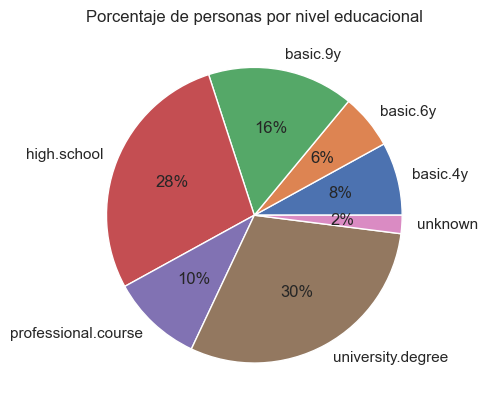

In [94]:
df1.groupby('education').size().plot.pie(autopct = '%0.0f%%')
plt.title('Porcentaje de personas por nivel educacional')
plt.show()

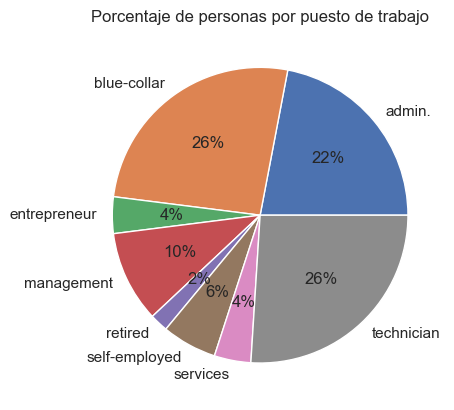

In [95]:
df1.groupby('job').size().plot.pie(autopct = '%0.0f%%')
plt.title('Porcentaje de personas por puesto de trabajo')
plt.show()

**2.2.- Gráficos Bar Chart sobre el dataframe 2:**
- Se generó un gráfico de la cantidad de clientes por atributo **month** y **contact**, en donde se observó que mayo fue el mes en que más clientes se contactaron con el banco vía celular.
- Se generó un gráfico de la cantidad de clientes por atributo **month** y **poutcome**, en donde se observó que noviembre fue el único mes en donde la campaña de marketing del banco tuvo éxito.

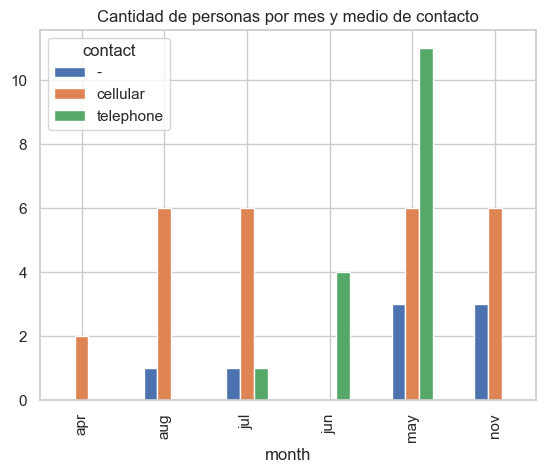

In [96]:
df2.groupby(['month','contact']).size().unstack().plot.bar()
plt.title('Cantidad de personas por mes y medio de contacto')
plt.show()

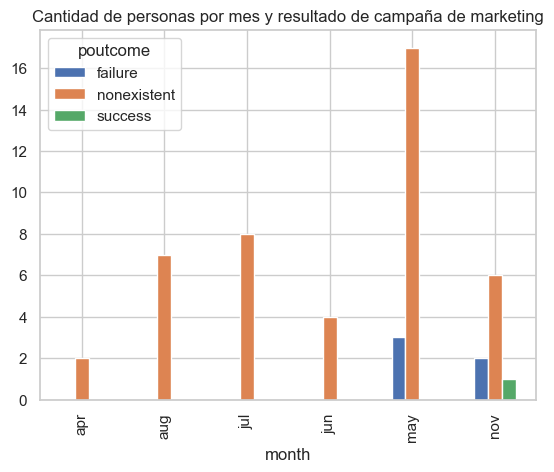

In [97]:
df2.groupby(['month','poutcome']).size().unstack().plot.bar()
plt.title('Cantidad de personas por mes y resultado de campaña de marketing')
plt.show()

**2.3.- Gráficos Violin Chart sobre el dataframe 3:**
- Se generó un gráfico entre los atributos **contact** y **cons.price.idx**, en donde se observó que en promedio el precio al consumidor es mayor para clientes que se contactaron vía teléfono que para clientes que se contactaron vía celular.
- Se generó un gráfico entre los atributos **contact** y **cons.conf.idx**, en donde se observó que en promedio la confianza del consumidor es mayor para clientes que se contactaron vía teléfono que para clientes que se contactaron vía celular.

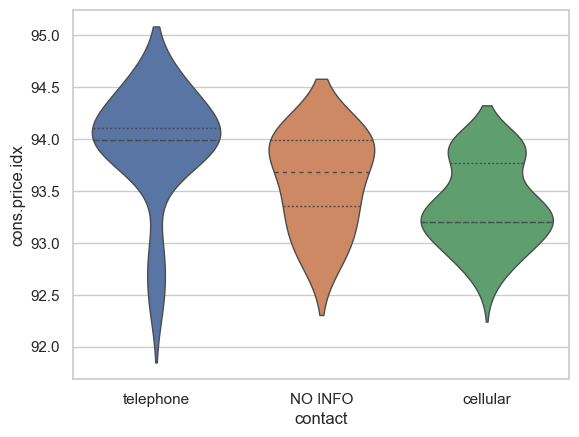

In [98]:
sns.set_theme(style = 'whitegrid')
ax = sns.violinplot(data = df3, x = 'contact', y = 'cons.price.idx', split = True, inner = 'quart', linewidth = 1)

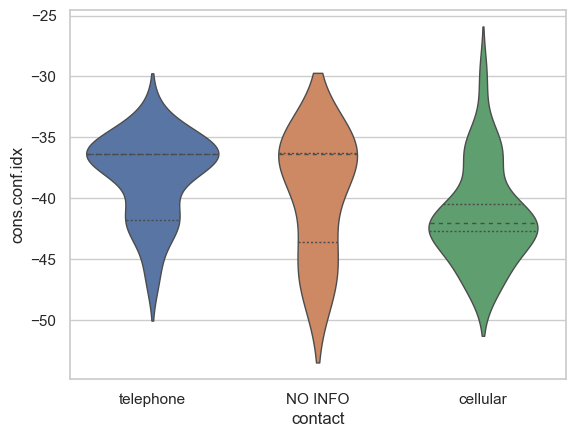

In [99]:
sns.set_theme(style = 'whitegrid')
ax = sns.violinplot(data = df3, x = 'contact', y = 'cons.conf.idx', split = True, inner = 'quart', linewidth = 1)

## 3.- Unir datasets, explicar el tipo de unión y atributo escogido para la unión. Complementar información entre atributos, eliminar atributos innecesarios. Explicar las decisiones tomadas (30 ptos.):

Apoyarse en la documentación de Pandas para los distintos tipos de uniones https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Respuesta:

**3.1.- Unión de los dataframes:**
- El atributo elegido para unir df1 con df2 en df12 fue **id** ya que es único en ambos df.
- El atributo elegido para unir df12 con df3 en df123 fue **id** ya que es único en ambos df.

In [100]:
df12 = pd.merge(df1, df2, left_on = 'id', right_on = 'id')
df123 = pd.merge(df12, df3, left_on = 'id', right_on = 'id')

**3.2.- Identificación de los atributos del dataframe unido:**
- Se detectaron los atributos complementarios **age_x** y **age_y**.
- Se detectaron los atributos complementarios **day_of_week_x** y **day_of_week_y**.
- Se detectaron los atributos complementarios **contact_x** y **contact_y**.
- Se detectaron los atributos inncesarios **Unnamed: 0_x** y **Unnamed: 0_y**.

In [101]:
df123.columns

Index(['Unnamed: 0_x', 'id', 'age_x', 'job', 'marital', 'education', 'default',
       'housing', 'day_of_week_x', 'Unnamed: 0_y', 'contact_x', 'month',
       'day_of_week_y', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'age_y', 'Unnamed: 0', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'contact_y'],
      dtype='object')

**3.3.- Correción del dataframe unido:**

- Se reemplazaron los datos **-** por datos **NaN**.
- Se reemplazaron los datos **NO INFO** por datos **NaN**.
- Se reemplazaron los datos **unknown** por datos **NaN**.

In [102]:
df123['contact_x'] = np.where(df123['contact_x'] == "-", np.nan, df123['contact_x'])
df123['contact_y'] = np.where(df123['contact_y'] == "NO INFO", np.nan, df123['contact_y'])
df123['education'] = np.where(df123['education'] == "unknown", np.nan, df123['education'])
df123['default'] = np.where(df123['default'] == "unknown", np.nan, df123['default'])
df123['housing'] = np.where(df123['housing'] == "unknown", np.nan, df123['housing'])

**3.4.- Reducción del dataframe unido:**
- Se combinó la información de los atributos **contact_x** y **contact_y** en un solo atributo **contact**.
- Se combinó la información los atributos **age_x** y **age_y** en un solo atributo **age**.
- Se combinó la información los atributos **day_of_week_x** y **day_of_week_y** en un solo atributo **day_of_week**.
- Se eliminaron los atributos:
  - **contact_x** y **contact_y**
  - **age_x** y **age_y**
  - **day_of_week_x** y **day_of_week_y**
  - **Unnamed 0_x** y **Unnamed 0_y**.

In [103]:
ynan = np.where(pd.isna(df123['contact_x']), df123['contact_y'], df123['contact_x'])
df123['contact'] = np.where(df123['contact_x'] == df123['contact_y'], df123['contact_y'], ynan)

In [104]:
ynan = np.where(pd.isna(df123['age_x']), df123['age_y'], df123['age_x'])
df123['age'] = np.where(df123['age_x'] == df123['age_y'], df123['age_y'], ynan)

In [105]:
ynan = np.where(pd.isna(df123['day_of_week_x']), df123['day_of_week_y'], df123['day_of_week_x'])
df123['day_of_week'] = np.where(df123['day_of_week_x'] == df123['day_of_week_y'], df123['day_of_week_y'], ynan)

In [106]:
df123 = df123.drop(labels = ['contact_x', 'contact_y'], axis = 1)
df123 = df123.drop(labels = ['age_x', 'age_y'], axis = 1)
df123 = df123.drop(labels = ['day_of_week_x', 'day_of_week_y'], axis = 1)
df123 = df123.drop(labels = ['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

**3.5.- Visualización parcial del dataframe unido:**

In [107]:
df123.head()

,id,job,marital,education,default,housing,month,duration,campaign,pdays,previous,poutcome,Unnamed: 0,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact,age,day_of_week
0,2292,entrepreneur,divorced,university.degree,no,yes,may,231,1,999,1,failure,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone,51.0,mon
1,1536,management,married,university.degree,no,yes,aug,263,2,999,0,nonexistent,1536,1.4,93.444,-36.1,4.968,5228.1,cellular,37.0,tue
2,4047,blue-collar,married,basic.4y,NaN,no,jun,95,2,999,0,nonexistent,4047,1.4,94.465,-41.8,4.959,5228.1,telephone,38.0,wed
3,3862,technician,married,professional.course,no,yes,nov,495,1,3,1,success,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular,52.0,fri
4,1340,admin.,married,university.degree,no,yes,aug,428,4,999,0,nonexistent,1340,1.4,93.444,-36.1,4.964,5228.1,cellular,32.0,wed


**3.6.- Cantidad de datos nulos por atributo en el dataframe unido:**
- Se detectó 1 dato **NaN** en el atributo **education**.
- Se detectaron 13 datos **NaN** en el atributo **education**.
- Se detectó 1 dato **NaN** en el atributo **housing**.
- Se detectaron 2 datos **NaN** en el atributo **day_of_week**.

In [108]:
pd.isna(df123).sum()

id                 0
job                0
marital            0
education          1
default           13
housing            1
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
Unnamed: 0         0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
contact            0
age                0
day_of_week        2
dtype: int64

## 4.- Transformar a formato pedido en tabla output.csv, el resultado debe quedar igual a la tabla presentada en el archivo output.csv. Normalizar los datos numéricos, explicar el tipo de normalización utilizada (recordar que es normalización de datos y no normalización de base de datos, i.e. Standard Scaler, MinMax Scaler, etc.) (30 ptos.):

Apoyarse en la documentación de Scikit-Learn para los distintos tipos de normalización de datos https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## Respuesta:

**4.1.- Reordenamiento de atributos del dataframe unido:**

In [109]:
df = df123[
    ['Unnamed: 0', 
    'id', 
    'age', 
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing',  
    'contact', 
    'month', 
    'day_of_week', 
    'duration', 
    'campaign', 
    'pdays', 
    'previous', 
    'poutcome', 
    'emp.var.rate', 
    'cons.price.idx', 
    'cons.conf.idx', 
    'euribor3m', 
    'nr.employed', 
    ]]

**4.2.- Modificación de formatos y valores de atributos:**
- Se reescribió el nombre completo del mes en el atributo **month**.
- Se reescribió el nombre completo del día en el atributo **day_of_week**.
- Se añadió la palabra **years** y se removió el decimal **.0** a la edad en el atributo **age**.
- Se reemplazó el **.** por un espacio vacío en los datos del atributo **education**.
- Se reemplazó el dato **nonexistent** por **not existent** en el atributo **poutcome**.

In [110]:
df['month'] = df.month.replace({
    'may' : 'may', 
    'aug' : 'august', 
    'jun' : "june", 
    'nov' : "november", 
    'jul' : "july", 
    'apr' : "april"
    })
df['month'].head()

0         may
1      august
2        june
3    november
4      august
Name: month, dtype: object

In [111]:
df['day_of_week'] = df.day_of_week.replace({
    'mon': 'monday', 
    'tue': 'tuesday', 
    'wed': 'wednesday', 
    'fri': 'friday', 
    'thu': 'thursday', 
    })
df['day_of_week'].head()

0       monday
1      tuesday
2    wednesday
3       friday
4    wednesday
Name: day_of_week, dtype: object

In [112]:
df['age'] = df['age'].astype(str) + ' years'
df['age'] = df['age'].str.replace('.0', '')
df['age'].head()

0    51 years
1    37 years
2    38 years
3    52 years
4    32 years
Name: age, dtype: object

In [113]:
df['education'] = df['education'].str.replace('.', ' ')
df['education'].head()

0      university degree
1      university degree
2               basic 4y
3    professional course
4      university degree
Name: education, dtype: object

In [114]:
df['poutcome'] = df['poutcome'].str.replace('nonexistent', 'not existent')
df['poutcome'].head()

0         failure
1    not existent
2    not existent
3         success
4    not existent
Name: poutcome, dtype: object

**4.3.- Normalización de datos:**
- Se fitearon los datos numéricos de df usando la función **fit** de la librería **StandardScaler**.
- Se normalizaron los datos numéricos de df usando la función **transform** de la librería **StandardScaler**.

In [115]:
scaler = StandardScaler()
scaler.fit(df[[
    'duration', 
    'campaign', 
    'pdays', 
    'previous', 
    'emp.var.rate', 
    'cons.price.idx', 
    'cons.conf.idx', 
    'euribor3m', 
    'nr.employed'
    ]])

StandardScaler()

In [116]:
df[[
    'duration', 
    'campaign', 
    'pdays', 
    'previous', 
    'emp.var.rate', 
    'cons.price.idx', 
    'cons.conf.idx', 
    'euribor3m', 
    'nr.employed'
    ]] = scaler.transform(df[[
    'duration', 
    'campaign', 
    'pdays', 
    'previous', 
    'emp.var.rate', 
    'cons.price.idx', 
    'cons.conf.idx', 
    'euribor3m', 
    'nr.employed'
    ]])

**4.4.- Visualización parcial del dataframe normalizado:**

In [117]:
df.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,2292,51 years,entrepreneur,divorced,university degree,no,yes,telephone,may,monday,-0.193269,-0.674469,0.142857,2.708013,failure,-1.541145,-1.365158,-1.496470,-1.757265,-1.429970
1,1536,1536,37 years,management,married,university degree,no,yes,cellular,august,tuesday,-0.035095,-0.147540,0.142857,-0.369274,not existent,0.780731,-0.283413,0.965952,0.661044,0.822144
2,4047,4047,38 years,blue-collar,married,basic 4y,NaN,no,telephone,june,wednesday,-0.865507,-0.147540,0.142857,-0.369274,not existent,0.780731,1.721054,-0.423732,0.655112,0.822144
3,3862,3862,52 years,technician,married,professional course,no,yes,cellular,november,friday,1.111665,-0.674469,-7.000000,2.708013,success,-2.702083,-1.844188,2.428777,-2.142850,-2.854563
4,1340,1340,32 years,admin.,married,university degree,no,yes,cellular,august,wednesday,0.780489,0.906318,0.142857,-0.369274,not existent,0.780731,-0.283413,0.965952,0.658408,0.822144


## 5.- Generar archivo de salida en formato csv o excel (3 ptos.):


## Respuesta:

**5.1.- Generación de archivo CSV desde el dataframe normalizado:**
- Se cambió el índice por defecto al atributo **Unnamed: 0**.
- Se eliminó el nombre del nuevo índice.

In [118]:
df = df.set_index('Unnamed: 0')
df.index.name = None
df.to_csv('data/output_fbcj.csv', sep = ',')